<a href="https://colab.research.google.com/github/Pedro184294/SERS---GS-2o-semestre/blob/main/SERS_GS_2o_semestre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== RELATÓRIO DE CONSUMO ENERGÉTICO ===
Funcionários: 50
Área da empresa: 300 m²
Período analisado: 30 dias
------------------------------------------
Consumo total: 10778.18 kWh
Consumo médio horário: 14.97 kWh
Pico de consumo: 26.56 kWh
Fator de carga: 0.56
------------------------------------------
Consumo fora do expediente: 5771.97 kWh (53.6%)
⚠️  Alerta: alto desperdício de energia fora do expediente!


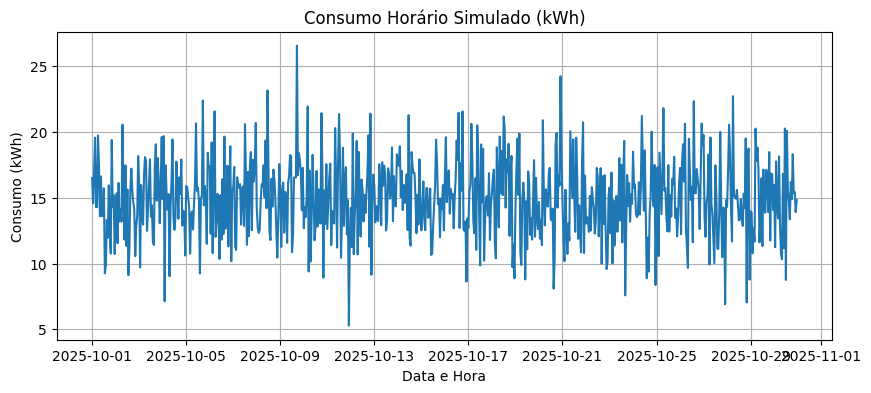

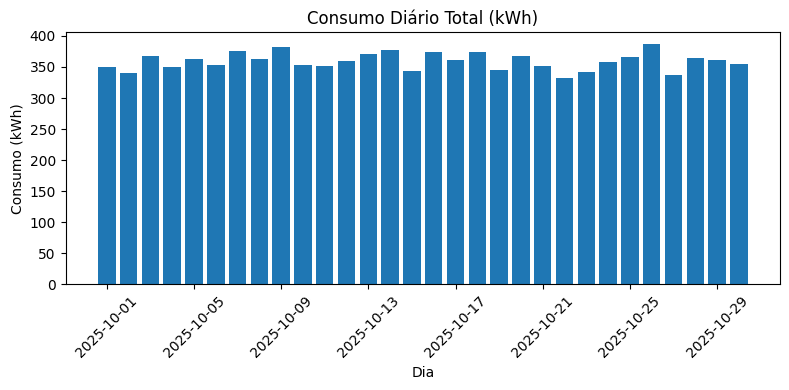


=== SUGESTÕES DE EFICIÊNCIA ENERGÉTICA ===
- Implementar sensores de presença e desligamento automático.
- Reavaliar iluminação e equipamentos em standby.
- Boa uniformidade no uso de energia, manter práticas atuais.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# -------------------------------------------------------------
# 1. Parâmetros de simulação
# -------------------------------------------------------------
num_funcionarios = 50
area_m2 = 300
dias = 30
potencia_base_kw = 15  # consumo base (em kW)
variacao_percentual = 0.2  # variação aleatória diária
seed = 42
np.random.seed(seed)

# -------------------------------------------------------------
# 2. Geração de dados simulados
# -------------------------------------------------------------
def gerar_dados_consumo(dias, potencia_base_kw, variacao_percentual):
    horas = dias * 24
    tempo = [datetime(2025, 10, 1) + timedelta(hours=i) for i in range(horas)]

    # Consumo em kWh
    consumo = potencia_base_kw * (1 + variacao_percentual * np.random.randn(horas))
    consumo = np.clip(consumo, a_min=0, a_max=None)

    df = pd.DataFrame({"DataHora": tempo, "Consumo_kWh": consumo})
    return df

df = gerar_dados_consumo(dias, potencia_base_kw, variacao_percentual)

# -------------------------------------------------------------
# 3. Análise estatística básica
# -------------------------------------------------------------
total_consumo = df["Consumo_kWh"].sum()
media = df["Consumo_kWh"].mean()
pico = df["Consumo_kWh"].max()
fator_carga = media / pico

# -------------------------------------------------------------
# 4. Detecção de desperdício (fora do expediente)
# -------------------------------------------------------------
def detectar_desperdicio(df):
    df["Hora"] = df["DataHora"].dt.hour
    # expediente: 8h às 18h
    fora_expediente = df[(df["Hora"] < 8) | (df["Hora"] > 18)]
    consumo_fora = fora_expediente["Consumo_kWh"].sum()
    percentual = 100 * consumo_fora / df["Consumo_kWh"].sum()
    return consumo_fora, percentual

desperdicio, perc_desperdicio = detectar_desperdicio(df)

# -------------------------------------------------------------
# 5. Relatórios no console
# -------------------------------------------------------------
print("=== RELATÓRIO DE CONSUMO ENERGÉTICO ===")
print(f"Funcionários: {num_funcionarios}")
print(f"Área da empresa: {area_m2} m²")
print(f"Período analisado: {dias} dias")
print("------------------------------------------")
print(f"Consumo total: {total_consumo:.2f} kWh")
print(f"Consumo médio horário: {media:.2f} kWh")
print(f"Pico de consumo: {pico:.2f} kWh")
print(f"Fator de carga: {fator_carga:.2f}")
print("------------------------------------------")
print(f"Consumo fora do expediente: {desperdicio:.2f} kWh ({perc_desperdicio:.1f}%)")

if perc_desperdicio > 20:
    print("⚠️  Alerta: alto desperdício de energia fora do expediente!")
elif perc_desperdicio > 10:
    print("🔸 Consumo razoável fora do expediente, possível otimização.")
else:
    print("✅ Excelente eficiência energética fora do expediente.")

# -------------------------------------------------------------
# 6. Visualização de dados
# -------------------------------------------------------------
# Agregação diária
df["Data"] = df["DataHora"].dt.date
consumo_diario = df.groupby("Data")["Consumo_kWh"].sum()

# Gráfico 1 — Consumo horário
plt.figure(figsize=(10, 4))
plt.plot(df["DataHora"], df["Consumo_kWh"])
plt.title("Consumo Horário Simulado (kWh)")
plt.xlabel("Data e Hora")
plt.ylabel("Consumo (kWh)")
plt.grid(True)
plt.show()

# Gráfico 2 — Consumo diário
plt.figure(figsize=(8, 4))
plt.bar(consumo_diario.index, consumo_diario.values)
plt.title("Consumo Diário Total (kWh)")
plt.xlabel("Dia")
plt.ylabel("Consumo (kWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------
# 7. Sugestões de eficiência (com base nos resultados)
# -------------------------------------------------------------
print("\n=== SUGESTÕES DE EFICIÊNCIA ENERGÉTICA ===")
if perc_desperdicio > 20:
    print("- Implementar sensores de presença e desligamento automático.")
    print("- Reavaliar iluminação e equipamentos em standby.")
if fator_carga < 0.5:
    print("- Avaliar redistribuição de cargas e horários de uso de equipamentos.")
else:
    print("- Boa uniformidade no uso de energia, manter práticas atuais.")
